# **Personality Prediction on Myers-Briggs Type Indicator Using ML, DL & NLP Techniques**

---



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing al libraries
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

# **Following is the link to our dataset**:
https://www.kaggle.com/datasnaek/mbti-type

This dataset is on kaggle which consists of 2 features as first is "posts" 50 social media posts in the form of string seperated by ||| and second is (type) Personality Types with total 8675 rows

In [ ]:
#load the dataset into dataframe
mbti_df = pd.read_csv("/content/drive/MyDrive/ML Project/mbti_1.csv")


### Exploratory Data Analysis (EDA)

In [ ]:
#First 5 rows of dataset is as follows
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
mbti_df.shape

(8675, 2)

As can be seen above, There exits 8675 rows and 2 columns

In [ ]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


Type of both the columns as of type object 

In [ ]:
mbti_df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'I would say that John from Homestuck is eithe...
freq,1832,1




1.   There exists 16 unique personality types.
2.   Personality type **INFJ** is most frequently occured in the dataset.
3.   Posts are all unique.



In [ ]:
mbti_df.isnull().any()

type     False
posts    False
dtype: bool

There does not exists any null values in any of the rows in the dataset.

In [ ]:
#Finding unique personality types
personality = np.unique(np.array(mbti_df['type']))
personality

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [ ]:
#Now counting posts for each personality types
personality_count = mbti_df.groupby(['type']).count()
personality_count

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


As can be seen above, **INFP** is the most frequently occuring personality type and **ESTJ** is the least frequently occuring type.

**From this we can infer that people having type *INFP* are more expressive in their feelings on social media even being introvert and *ESTJ* are less expressive even being extrovert**

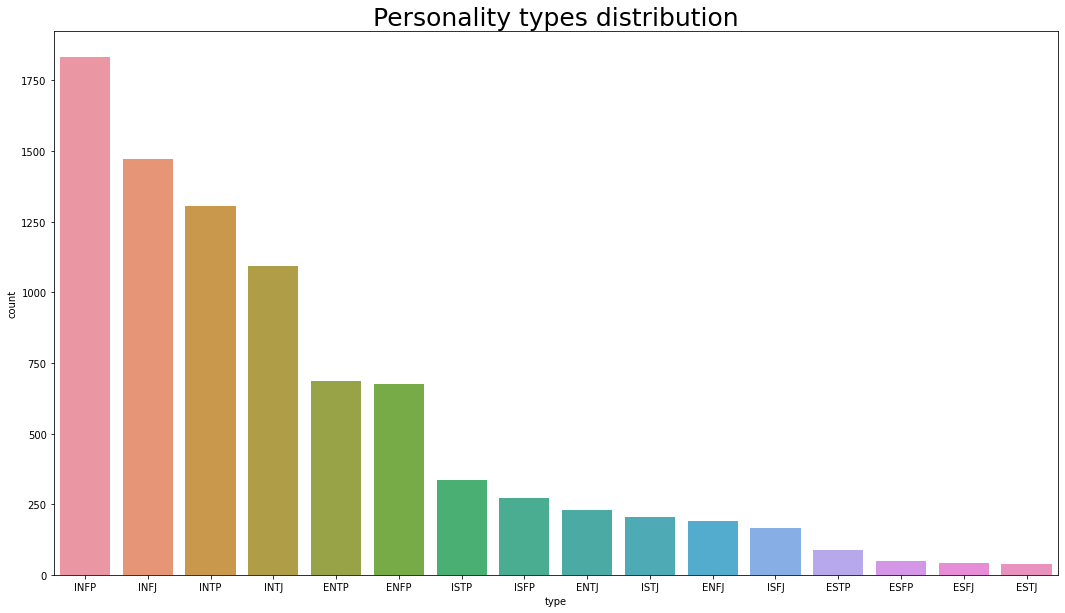

In [ ]:
#Plot to show above inference
plt.figure(figsize=(18,10))
sns.countplot(x='type', data=mbti_df, order=mbti_df.type.value_counts().index, orient='v')
sns.set_context('talk')
plt.title('Personality types distribution', fontsize=25)
plt.savefig('mbti_count.png')
plt.show()

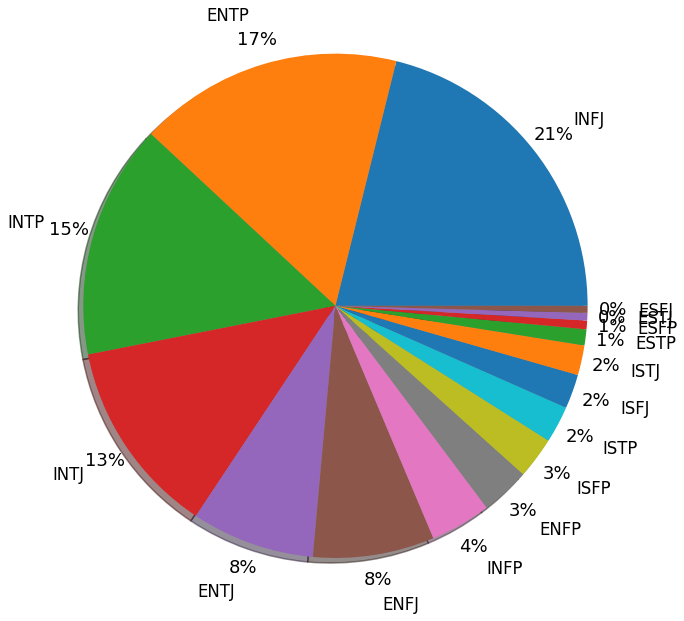

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(mbti_df.type.value_counts(),labels=mbti_df['type'].unique(), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,shadow=True)
plt.axis('equal')
plt.show()

As can be seen from the above pie plot that there exists variation in the dataset among personality types as **INFJ** among the highest covering 21% of the whole dataset. 

In [ ]:
#Finding the most common words in all posts.
token = list(mbti_df["posts"].apply(lambda x: x.split()))
words = []
for x in token:
  for y in x:
    words.append(y.lower())

In this, we have split the posts in the form of word lists and then convert all the words to lower case so that we can differentiate among words like 'The', 'the' ,'THe', 'THE' etc

In [ ]:
len(words)

10637645

Here, We have  in total of **10637645** words 

In [ ]:

Counter(words).most_common(50)

[('i', 413264),
 ('to', 292828),
 ('the', 291403),
 ('a', 236147),
 ('and', 231306),
 ('of', 179142),
 ('you', 141051),
 ('that', 132347),
 ('is', 131382),
 ('in', 122883),
 ('my', 115436),
 ('it', 107963),
 ('but', 88792),
 ('for', 87566),
 ('have', 81062),
 ('with', 78310),
 ('be', 69920),
 ('are', 66820),
 ('not', 64033),
 ('like', 63392),
 ("i'm", 60107),
 ('an', 59939),
 ('this', 59556),
 ('on', 58501),
 ('as', 57556),
 ('was', 56578),
 ('me', 56247),
 ('just', 51854),
 ('if', 49754),
 ('so', 49638),
 ('or', 48203),
 ("don't", 46842),
 ('about', 46661),
 ('think', 46585),
 ('what', 45138),
 ('do', 44388),
 ('your', 43368),
 ('when', 39982),
 ('at', 39560),
 ("it's", 38823),
 ('can', 38514),
 ('people', 37633),
 ('they', 34027),
 ('all', 33521),
 ('would', 33377),
 ('really', 31982),
 ('more', 31848),
 ('know', 31375),
 ('get', 29450),
 ('we', 29363)]

It can be easily observed from the above analysis that most frequent words are stop words in english such as 'a' , 'I', 'the' etc from which we can not get any information. Hence we should remove these words.

In [ ]:
mbti_df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


# Data PreProcessing

### 1. Removing URLs

In [ ]:
mbti_df['posts'] = mbti_df['posts'].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

In [ ]:
mbti_df.head()

,type,posts
0,INFJ,' enfp and intj moments sportscenter not ...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,"'Good one _____ Of course, to which I say..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired. That's another silly misconce...


### 2. Removing End Tokens like '?', ',' '.'

In [ ]:
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))

In [ ]:
mbti_df.head()

,type,posts
0,INFJ,' enfp and intj moments sportscenter not ...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,"'Good one _____ Of course, to which I say..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired EOSTokenDot That's another si...


### 3. Remove words that contain digits

In [ ]:
mbti_df['posts'] = mbti_df['posts'].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

In [ ]:
mbti_df.head()

,type,posts
0,INFJ,enfp and intj moments sportscenter not t...
1,ENTP,Im finding the lack of me in these posts very ...
2,INTP,Good one Of course to which I say I know...
3,INTJ,Dear INTP I enjoyed our conversation the oth...
4,ENTJ,Youre fired EOSTokenDot Thats another silly...


### 4. Lower casing words

In [ ]:
mbti_df['posts'] = mbti_df['posts'].apply(lambda x: x.lower())

In [ ]:
mbti_df.head()

,type,posts
0,INFJ,enfp and intj moments sportscenter not t...
1,ENTP,im finding the lack of me in these posts very ...
2,INTP,good one of course to which i say i know...
3,INTJ,dear intp i enjoyed our conversation the oth...
4,ENTJ,youre fired eostokendot thats another silly...


### 5. Removing multiple letters repeating words

In [ ]:
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x))

In [ ]:
mbti_df.head()

,type,posts
0,INFJ,enfp and intj moments sportscenter not t...
1,ENTP,im finding the lack of me in these posts very ...
2,INTP,good one of course to which i say i know...
3,INTJ,dear intp i enjoyed our conversation the oth...
4,ENTJ,youre fired eostokendot thats another silly...


### 6. Removing Parenthesis

In [ ]:
#Remove parenthesis
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub('(\[|\()*\d+(\]|\))*', ' ', x))


### 7. Removing more than 1 spacing

In [ ]:
#Remove spaces more than 1
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(' +', ' ', x).lower())


### 8. Lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
mbti_df['posts'] = mbti_df['posts'].apply(lambda x: WordNetLemmatizer().lemmatize(x))

This removes inflected words like 'develop' , 'developing' , 'developed' into single word 'develop'

---



### 9. Removal of Stop Words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print((stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Y= label_encoder.fit_transform(mbti_df['type'])

### Splitting the dataset into 70-30 % ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mbti_df['posts'], Y, test_size=0.33, stratify=Y, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(5812,) (5812,) (2863,) (2863,)


### 10. Implementing Bag of Words

In [ ]:
# Vectorizing the posts along with filtering Stop-words
vect = CountVectorizer(stop_words='english') 

In [ ]:
# Perform fitting on training data and then transforming it
mbti_bow =  vect.fit(X_train)
X_train_bow =  mbti_bow.transform(X_train)

In [ ]:
X_train_bow.shape

(5812, 81787)

In [ ]:
#Transforming test dataset 
X_test_bow =  mbti_bow.transform(X_test)

In [ ]:
X_test_bow.shape

(2863, 81787)

### 11. Implementing TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Vectorizing posts along with filtering stop words
vectorizer = TfidfVectorizer(stop_words='english')


In [ ]:
#Fitting on training dataset
mbti_tfidf = vectorizer.fit(X_train)

In [ ]:
#Performing transformation on train and test set
X_train_tfidf = mbti_tfidf.transform(X_train)
X_test_tfidf = mbti_tfidf.transform(X_test)

In [ ]:
X_train_tfidf.shape

(5812, 81787)

In [ ]:
X_test_tfidf.shape

(2863, 81787)

#**Implementing Models**

## Baseline Models

### Now we will try to implement baseline models on old BoW technique and new TF-IDF technique and compare them the results

### 1. SVM

In [ ]:
basef1_bow = {}
basef1_tfidf = {}

In [ ]:
#SVC for BOW
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train_bow, y_train)

Y_pred = svm.predict(X_test_bow)

# find predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
basef1_bow['SVM'] = score* 100.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.50      0.01      0.02       223
           2       0.00      0.00      0.00        76
           3       1.00      0.01      0.02       226
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        29
           8       0.57      0.32      0.41       485
           9       0.29      0.94      0.44       605
          10       0.75      0.21      0.33       360
          11       0.43      0.52      0.47       430
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00        68
          15       0.00      0.00      0.00       111

    accuracy                           0.36      2863
   macro avg       0.22   

In [ ]:
#SVC for Tf-IDF
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train_tfidf, y_train)

Y_pred = svm.predict(X_test_tfidf)

# find predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
basef1_tfidf['SVM'] = score* 100.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      0.24      0.35       223
           2       1.00      0.01      0.03        76
           3       0.60      0.28      0.38       226
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        29
           8       0.60      0.55      0.57       485
           9       0.41      0.89      0.56       605
          10       0.65      0.50      0.56       360
          11       0.53      0.74      0.62       430
          12       0.50      0.02      0.04        55
          13       0.50      0.02      0.04        89
          14       0.50      0.01      0.03        68
          15       0.77      0.18      0.29       111

    accuracy                           0.50      2863
   macro avg       0.42   

In [ ]:

#Random Forest for BOW
random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train_bow, y_train)

# make predictions for test data
Y_pred = random_forest.predict(X_test_bow)

# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
basef1_bow['Random Forest'] = score* 100.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.53      0.09      0.16       223
           2       0.00      0.00      0.00        76
           3       0.65      0.16      0.26       226
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        29
           8       0.41      0.49      0.44       485
           9       0.34      0.88      0.49       605
          10       0.54      0.29      0.38       360
          11       0.53      0.55      0.54       430
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00        68
          15       0.00      0.00      0.00       111

    accuracy                           0.41      2863
   macro avg       0.19   

### 2. Random Forest

In [ ]:

#Random Forest for TF-IDF
random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train_tfidf, y_train)

# make predictions for test data
Y_pred = random_forest.predict(X_test_tfidf)

# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
basef1_tfidf['Random Forest'] = score* 100.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.53      0.08      0.14       223
           2       0.00      0.00      0.00        76
           3       0.53      0.07      0.12       226
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        29
           8       0.42      0.52      0.47       485
           9       0.33      0.86      0.48       605
          10       0.55      0.30      0.39       360
          11       0.53      0.55      0.54       430
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00        68
          15       0.00      0.00      0.00       111

    accuracy                           0.40      2863
   macro avg       0.18   

# Analysis of Baseline Models

In [ ]:
pd.DataFrame.from_dict(basef1_bow, orient='index', columns=['F1-Score Baseline(%)'])

,F1-Score Baseline(%)
SVM,35.731750
Random Forest,40.691582


In [ ]:
pd.DataFrame.from_dict(basef1_tfidf, orient='index', columns=['F1-Score Achieved(TF-TDF)'])

,F1-Score Achieved(TF-TDF)
SVM,50.471533
Random Forest,40.202585


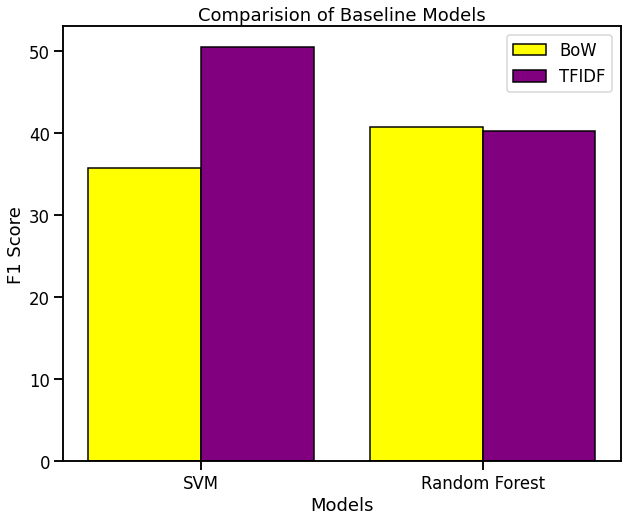

In [ ]:
#Plot for comparision between baseline models
X = ['SVM', 'Random Forest']
basef1_bow_list = list(basef1_bow.values())
basef1_tfidf_list =  list(basef1_tfidf.values())
f1_bows = basef1_bow_list
f1_tfidfs = basef1_tfidf_list
  
X_axis = np.arange(len(X))
plt.figure(figsize=(10,8))   
plt.bar(X_axis - 0.2, f1_bows, 0.4, label = 'BoW',color = 'yellow',edgecolor = 'black')
plt.bar(X_axis + 0.2, f1_tfidfs, 0.4, label = 'TFIDF',color = 'purple',edgecolor = 'black')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Comparision of Baseline Models")
plt.legend()

plt.show()

### We have compared above Baseline models i.e SVM and Random Forest by capturing their F1-Scores using Bag of Words Techniques and TF-IDF Techniques represented by yellow and purple color respectively. As can be seen there is a huge improvement in case of SVM while comparable scores for random forest.

## Other ML Models

### Now we will try to implement new models on the above techniques and do analysis on them

In [ ]:
Newf1_bow = {}
Newf1_tfidf = {}

### 1. XG-Boost Classifier

In [ ]:
#XG boost Classifier for BOW Model
xgb = XGBClassifier()
xgb.fit(X_train_bow,y_train)

Y_pred = xgb.predict(X_test_bow)


# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
Newf1_bow['XG Boost'] = score* 100.0


              precision    recall  f1-score   support

           0       0.52      0.21      0.30        63
           1       0.61      0.43      0.50       223
           2       0.54      0.33      0.41        76
           3       0.55      0.47      0.50       226
           4       0.25      0.07      0.11        14
           5       0.00      0.00      0.00        16
           6       1.00      0.15      0.27        13
           7       0.64      0.24      0.35        29
           8       0.64      0.62      0.63       485
           9       0.49      0.78      0.60       605
          10       0.63      0.59      0.61       360
          11       0.65      0.69      0.67       430
          12       0.64      0.33      0.43        55
          13       0.57      0.30      0.40        89
          14       0.67      0.43      0.52        68
          15       0.70      0.58      0.63       111

    accuracy                           0.58      2863
   macro avg       0.57   

In [ ]:
#XG boost Classifier for TF-IDF
xgb = XGBClassifier()
xgb.fit(X_train_tfidf,y_train)

Y_pred = xgb.predict(X_test_tfidf)


# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
Newf1_tfidf['XG Boost'] = score* 100.0


              precision    recall  f1-score   support

           0       0.54      0.24      0.33        63
           1       0.57      0.43      0.49       223
           2       0.63      0.32      0.42        76
           3       0.55      0.47      0.51       226
           4       0.50      0.14      0.22        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.45      0.17      0.25        29
           8       0.63      0.61      0.62       485
           9       0.50      0.78      0.61       605
          10       0.61      0.59      0.60       360
          11       0.65      0.68      0.66       430
          12       0.66      0.38      0.48        55
          13       0.62      0.34      0.44        89
          14       0.57      0.37      0.45        68
          15       0.68      0.54      0.60       111

    accuracy                           0.58      2863
   macro avg       0.51   

### 2. CatBoost Classifier

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=50)

# fit the model with the training data
model.fit(X_train_bow,y_train,plot=False)


# predict the target on the train dataset
Y_pred = model.predict(X_test_bow)
# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
Newf1_bow['Cat Boost'] = score* 100.0


Learning rate set to 0.5
0:	learn: 2.2468091	total: 5.47s	remaining: 4m 28s
1:	learn: 2.0086316	total: 11s	remaining: 4m 22s
2:	learn: 1.9065735	total: 15.3s	remaining: 4m
3:	learn: 1.8411378	total: 19.8s	remaining: 3m 48s
4:	learn: 1.7646971	total: 24.3s	remaining: 3m 38s
5:	learn: 1.7199275	total: 28.8s	remaining: 3m 31s
6:	learn: 1.6563070	total: 33.3s	remaining: 3m 24s
7:	learn: 1.6293240	total: 37.7s	remaining: 3m 17s
8:	learn: 1.6158091	total: 42s	remaining: 3m 11s
9:	learn: 1.5929751	total: 46.5s	remaining: 3m 5s
10:	learn: 1.5841710	total: 51.1s	remaining: 3m 1s
11:	learn: 1.5697990	total: 55.7s	remaining: 2m 56s
12:	learn: 1.5496557	total: 1m	remaining: 2m 51s
13:	learn: 1.5277135	total: 1m 4s	remaining: 2m 46s
14:	learn: 1.5043157	total: 1m 9s	remaining: 2m 41s
15:	learn: 1.5024639	total: 1m 13s	remaining: 2m 36s
16:	learn: 1.4656779	total: 1m 18s	remaining: 2m 31s
17:	learn: 1.4429899	total: 1m 22s	remaining: 2m 27s
18:	learn: 1.4296146	total: 1m 27s	remaining: 2m 22s
19:	le

In [ ]:
#Cat Boost for TF-IDF
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=10,learning_rate=1)

# fit the model with the training data
model.fit(X_train_tfidf,y_train,plot=False)


# predict the target on the train dataset
Y_pred = model.predict(X_test_tfidf)
# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
Newf1_tfidf['Cat Boost'] = score* 100.0


Learning rate set to 0.5
0:	learn: 2.1732671	total: 14.7s	remaining: 11m 59s
1:	learn: 1.9841604	total: 28.7s	remaining: 11m 28s
2:	learn: 1.8843371	total: 43.7s	remaining: 11m 25s
3:	learn: 1.8256175	total: 58.5s	remaining: 11m 13s
4:	learn: 1.7753834	total: 1m 13s	remaining: 11m 2s
5:	learn: 1.7290858	total: 1m 27s	remaining: 10m 43s
6:	learn: 1.6620279	total: 1m 42s	remaining: 10m 28s
7:	learn: 1.6311165	total: 1m 57s	remaining: 10m 17s
8:	learn: 1.5851710	total: 2m 12s	remaining: 10m 5s
9:	learn: 1.5660390	total: 2m 27s	remaining: 9m 48s
10:	learn: 1.5424166	total: 2m 41s	remaining: 9m 32s
11:	learn: 1.5331353	total: 2m 55s	remaining: 9m 16s
12:	learn: 1.5265316	total: 3m 10s	remaining: 9m 3s
13:	learn: 1.5115529	total: 3m 25s	remaining: 8m 48s
14:	learn: 1.4995529	total: 3m 39s	remaining: 8m 32s
15:	learn: 1.4937098	total: 3m 54s	remaining: 8m 18s
16:	learn: 1.4811806	total: 4m 9s	remaining: 8m 4s
17:	learn: 1.4718463	total: 4m 24s	remaining: 7m 50s
18:	learn: 1.4330185	total: 4m 

### 3. KNN Classifier

In [ ]:
#KNN
#KNN Classifier for BOW
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 200)  # n_neighbors means k
knn.fit(X_train_bow, y_train)

Y_pred = knn.predict(X_test_bow)
# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
Newf1_bow['KNN'] = score* 100.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00       223
           2       0.00      0.00      0.00        76
           3       0.00      0.00      0.00       226
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        29
           8       0.30      0.26      0.28       485
           9       0.26      0.83      0.40       605
          10       0.47      0.11      0.18       360
          11       0.34      0.35      0.35       430
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00        68
          15       0.00      0.00      0.00       111

    accuracy                           0.29      2863
   macro avg       0.09   

In [ ]:
#KNN Classifier for TF-IDF
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 200)  # n_neighbors means k
knn.fit(X_train_tfidf, y_train)

Y_pred = knn.predict(X_test_tfidf)
# evaluate predictions
print(classification_report(y_test,Y_pred))
score = f1_score(y_test, Y_pred, average='micro')
Newf1_tfidf['KNN'] = score* 100.0

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.50      0.01      0.02       223
           2       0.00      0.00      0.00        76
           3       1.00      0.00      0.01       226
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        29
           8       0.18      0.91      0.30       485
           9       0.36      0.19      0.24       605
          10       0.29      0.01      0.01       360
          11       0.34      0.03      0.06       430
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00        68
          15       1.00      0.01      0.02       111

    accuracy                           0.20      2863
   macro avg       0.23   

# Analysis of New Models

In [ ]:
pd.DataFrame.from_dict(Newf1_bow, orient='index', columns=['F1 Score BoW New(%)'])

,F1 Score BoW New(%)
XG Boost,58.085924
Cat Boost,54.662941
KNN,28.711142


In [ ]:
pd.DataFrame.from_dict(Newf1_tfidf, orient='index', columns=['F1 Score TF-IDF New(%)'])

,F1 Score TF-IDF New(%)
XG Boost,57.841425
Cat Boost,53.440447
KNN,20.048900


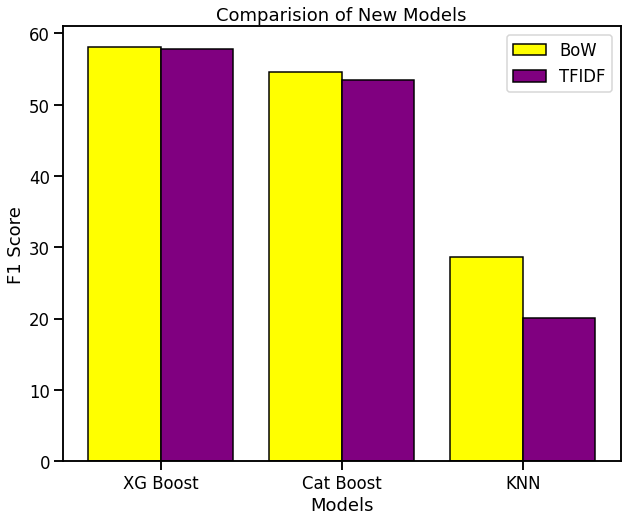

In [ ]:
#Plot for comparision between baseline models
X = list(Newf1_bow.keys())
Newf1_bow_list = list(Newf1_bow.values())
Newf1_tfidf_list =  list(Newf1_tfidf.values())
f1_bows = Newf1_bow_list
f1_tfidfs = Newf1_tfidf_list
  
X_axis = np.arange(len(X))
plt.figure(figsize=(10,8))   
plt.bar(X_axis - 0.2, f1_bows, 0.4, label = 'BoW',color = 'yellow',edgecolor = 'black')
plt.bar(X_axis + 0.2, f1_tfidfs, 0.4, label = 'TFIDF',color = 'purple',edgecolor = 'black')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Comparision of New Models")
plt.legend()

plt.show()

### We have implemented New Boosting techniques XG-Boost and CatBoost and KNN classification using both Bag of Words Technique and TF-IDF but observed that TF-IDF even performed less precisely as compared to BoW techniques.


### So, There is a need arises for some new formulation either to dataset or models to increase the f1 scores since earlier approaches did not appear acceptable.



---


---



# Dataset Tweaking

## **MBTI across 4 axis**

---



As we have seen all the ML models that we have applied have given F1 score of around 0.5 which is pretty bad.

So instead of training model on all 16 types of personalities, we now try to train models on 4 classifiers individually for better predictions.

**16 Personality types across 4 axis :**

1. Introversion (I) – Extroversion (E)
2. Intuition (N) – Sensing (S)
3. Thinking (T) – Feeling (F)
4. Judging (J) – Perceiving (P)

In [ ]:
mbti_df['I/E'] = mbti_df.type
mbti_df['N/S'] = mbti_df.type
mbti_df['F/T'] = mbti_df.type
mbti_df['P/J'] = mbti_df.type

for i, t in enumerate(mbti_df.type):
    if 'I' in t:
        mbti_df['I/E'][i] = 'I'
    elif 'E' in t:
        mbti_df['I/E'][i] = 'E'
        
    if 'N' in t:
        mbti_df['N/S'][i] = 'N'
    elif 'S' in t:
        mbti_df['N/S'][i] = 'S'
        
    if 'F' in t:
        mbti_df['F/T'][i] = 'F'
    elif 'T' in t:
        mbti_df['F/T'][i] = 'T'
        
    if 'P' in t:
        mbti_df['P/J'][i] = 'P'
    elif 'J' in t:
        mbti_df['P/J'][i] = 'J'


posts = mbti_df.posts.values
yIE = mbti_df['I/E'].values
yNS = mbti_df['N/S'].values
yFT = mbti_df['F/T'].values
yPJ = mbti_df['P/J'].values
y = mbti_df.type

In [ ]:
mbti_df

,type,posts,I/E,N/S,F/T,P/J
0,INFJ,enfp and intj moments sportscenter not top te...,I,N,F,J
1,ENTP,im finding the lack of me in these posts very ...,E,N,T,P
2,INTP,good one of course to which i say i know thats...,I,N,T,P
3,INTJ,dear intp i enjoyed our conversation the other...,I,N,T,J
4,ENTJ,youre fired eostokendot thats another silly mi...,E,N,T,J
...,...,...,...,...,...,...
8670,ISFP,ixfp just because i always think of cats as f...,I,S,F,P
8671,ENFP,so eostokendot eostokendot eostokendot if this...,E,N,F,P
8672,INTP,so many questions when i do these things eosto...,I,N,T,P
8673,INFP,i am very conflicted right now when it comes t...,I,N,F,P


In [ ]:
print("Frequency :")
print("-------------------------------------------------------")
print ("Introversion (I) /  Extroversion (E):   ", mbti_df['I/E'].value_counts()['I'], " / ", mbti_df['I/E'].value_counts()['E'])
print ("Intuition (N) / Sensing (S):            ", mbti_df['N/S'].value_counts()['N'], " / ", mbti_df['N/S'].value_counts()['S'])
print ("Thinking (T) / Feeling (F):             ", mbti_df['F/T'].value_counts()['F'], " / ", mbti_df['F/T'].value_counts()['T'])
print ("Judging (J) / Perceiving (P):           ", mbti_df['P/J'].value_counts()['P'], " / ", mbti_df['P/J'].value_counts()['J'])

Frequency :
-------------------------------------------------------
Introversion (I) /  Extroversion (E):    6676  /  1999
Intuition (N) / Sensing (S):             7478  /  1197
Thinking (T) / Feeling (F):              4694  /  3981
Judging (J) / Perceiving (P):            5241  /  3434


In [ ]:
cv = CountVectorizer(analyzer="word", max_features=5000) 
xCV = cv.fit_transform(mbti_df['posts'])
tfidf = TfidfTransformer()

print("Now the dataset size is as below")
X_tfidf =  tfidf.fit_transform(xCV).toarray()
print(X_tfidf.shape)

### Train-Test Splitting :

In [ ]:
xIETrain, xIETest, yIETrain, yIETest = train_test_split(X_tfidf, yIE, test_size=0.25,stratify=yIE)
xNSTrain, xNSTest, yNSTrain, yNSTest = train_test_split(X_tfidf, yNS, test_size=0.25,stratify=yNS)
xFTTrain, xFTTest, yFTTrain, yFTTest = train_test_split(X_tfidf, yFT, test_size=0.25,stratify=yFT)
xPJTrain, xPJTest, yPJTrain, yPJTest = train_test_split(X_tfidf, yPJ, test_size=0.25,stratify=yPJ)

We have splitted the data with 75:25 train-test ratio.

**For handling Imbalancement of data, we have used stratify parameter** 

## Models

1. SVM

In [ ]:
#SVM for TF-IDF
from sklearn.svm import SVC

svm1 = SVC(random_state = 1)
svmIE= svm1.fit(xIETrain,yIETrain)

svm2 = SVC(random_state = 1)
svmNS= svm2.fit(xNSTrain,yNSTrain)

svm3 = SVC(random_state = 1)
svmFT= svm3.fit(xFTTrain,yFTTrain)

svm4 = SVC(random_state = 1)
svmPJ= svm4.fit(xPJTrain,yPJTrain)

In [ ]:
Y_pred_IE = svmIE.predict(xIETest)
Y_pred_NS = svmNS.predict(xNSTest)
Y_pred_FT = svmFT.predict(xFTTest)
Y_pred_PJ = svmPJ.predict(xPJTest)

In [ ]:
print("Results : Testing")
print("------------------")

print("I/E :")
f1_svmIE=f1_score(yIETest, Y_pred_IE, average='micro')
print(f1_svmIE)
print("N/S :")
f1_svmNS=f1_score(yNSTest, Y_pred_NS, average='micro')
print(f1_svmNS)
print("F/T :")
f1_svmFT=f1_score(yFTTest, Y_pred_FT, average='micro')
print(f1_svmFT)
print("P/J :")
f1_svmPJ=f1_score(yPJTest, Y_pred_PJ, average='micro')
print(f1_svmPJ)

Results : Testing
------------------
I/E :
0.7773167358229599
N/S :
0.8621484555094514
F/T :
0.7819271553711388
P/J :
0.6823420931304749


2. Random Forest

In [ ]:
#Random Forest for TF-IDF
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=100, random_state = 1)
rfIE= rf1.fit(xIETrain,yIETrain)

rf2 = RandomForestClassifier(n_estimators=100, random_state = 1)
rfNS= rf2.fit(xNSTrain,yNSTrain)

rf3 = RandomForestClassifier(n_estimators=100, random_state = 1)
rfFT= rf3.fit(xFTTrain,yFTTrain)

rf4 = RandomForestClassifier(n_estimators=100, random_state = 1)
rfPJ= rf4.fit(xPJTrain,yPJTrain)

In [ ]:
Y_pred_IE = rfIE.predict(xIETest)
Y_pred_NS = rfNS.predict(xNSTest)
Y_pred_FT = rfFT.predict(xFTTest)
Y_pred_PJ = rfPJ.predict(xPJTest)

In [ ]:
print("Results : Testing")
print("------------------")

print("I/E :")
f1_rfIE=f1_score(yIETest, Y_pred_IE, average='micro')
print(f1_rfIE)
print("N/S :")
f1_rfNS=f1_score(yNSTest, Y_pred_NS, average='micro')
print(f1_rfNS)
print("F/T :")
f1_rfFT=f1_score(yFTTest, Y_pred_FT, average='micro')
print(f1_rfFT)
print("P/J :")
f1_rfPJ=f1_score(yPJTest, Y_pred_PJ, average='micro')
print(f1_rfPJ)

Results : Testing
------------------
I/E :
0.7713231904103274
N/S :
0.8630705394190872
F/T :
0.7408944213923468
P/J :
0.6625172890733056


3. XGBOOST

In [ ]:
#XG boost Classifier on TFIDF :
xgb1 = XGBClassifier()
xgbIE=xgb1.fit(xIETrain,yIETrain)

In [ ]:
xgb2 = XGBClassifier()
xgbNS=xgb2.fit(xNSTrain,yNSTrain)

In [ ]:
xgb3 = XGBClassifier()
xgbFT=xgb3.fit(xFTTrain,yFTTrain)

In [ ]:
xgb4 = XGBClassifier()
xgbPJ=xgb4.fit(xPJTrain,yPJTrain)

In [ ]:
Y_pred_IE = xgbIE.predict(xIETest)
Y_pred_NS = xgbNS.predict(xNSTest)
Y_pred_FT = xgbFT.predict(xFTTest)
Y_pred_PJ = xgbPJ.predict(xPJTest)

In [ ]:
print("Results : Testing")
print("------------------")

print("I/E :")
f1_xgboostIE=f1_score(yIETest, Y_pred_IE, average='micro')
print(f1_xgboostIE)
print("N/S :")
f1_xgboostNS=f1_score(yNSTest, Y_pred_NS, average='micro')
print(f1_xgboostNS)
print("F/T :")
f1_xgboostFT=f1_score(yFTTest, Y_pred_FT, average='micro')
print(f1_xgboostFT)
print("P/J :")
f1_xgboostPJ=f1_score(yPJTest, Y_pred_PJ, average='micro')
print(f1_xgboostPJ)

Results : Testing
------------------
I/E :
0.7856154910096818
N/S :
0.8736745043798986
F/T :
0.7487321346242508
P/J :
0.702166897187644


4. Cat Boost

In [ ]:
#Cat Boost for TF-IDF
from catboost import CatBoostClassifier

cat1 = CatBoostClassifier(iterations=10,learning_rate=1)
catIE= cat1.fit(xIETrain,yIETrain)

cat2 = CatBoostClassifier(iterations=10,learning_rate=1)
catNS= cat2.fit(xNSTrain,yNSTrain)

cat3 = CatBoostClassifier(iterations=10,learning_rate=1)
catFT= cat3.fit(xFTTrain,yFTTrain)

cat4 = CatBoostClassifier(iterations=10,learning_rate=1)
catPJ= cat4.fit(xPJTrain,yPJTrain)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.5036151	total: 1.15s	remaining: 10.3s
1:	learn: 0.4847703	total: 1.92s	remaining: 7.67s
2:	learn: 0.4676751	total: 2.69s	remaining: 6.28s
3:	learn: 0.4578310	total: 3.48s	remaining: 5.21s
4:	learn: 0.4511236	total: 4.25s	remaining: 4.25s
5:	learn: 0.4442184	total: 5.02s	remaining: 3.35s
6:	learn: 0.4413302	total: 5.78s	remaining: 2.48s
7:	learn: 0.4360639	total: 6.54s	remaining: 1.63s
8:	learn: 0.4300127	total: 7.31s	remaining: 812ms
9:	learn: 0.4235002	total: 8.08s	remaining: 0us
0:	learn: 0.4009570	total: 1.05s	remaining: 9.48s
1:	learn: 0.3680540	total: 1.82s	remaining: 7.3s
2:	learn: 0.3453515	total: 2.59s	remaining: 6.05s
3:	learn: 0.3362675	total: 3.36s	remaining: 5.04s
4:	learn: 0.3270363	total: 4.13s	remaining: 4.13s
5:	learn: 0.3163781	total: 4.89s	remaining: 3.26s
6:	learn: 0.3098627	total: 5.65s	remaining: 2.42s
7:	learn: 0.3010410	total: 6.43s	remaining: 1.61s
8:	learn: 0.2969419	total: 7.22s	remaining: 802ms
9:	learn: 0.2912864	total: 7.98s	remaining: 0us
0:	le

In [ ]:
Y_pred_IE = catIE.predict(xIETest)
Y_pred_NS = catNS.predict(xNSTest)
Y_pred_FT = catFT.predict(xFTTest)
Y_pred_PJ = catPJ.predict(xPJTest)

In [ ]:
print("Results : Testing")
print("------------------")

print("I/E :")
f1_catIE=f1_score(yIETest, Y_pred_IE, average='micro')
print(f1_catIE)
print("N/S :")
f1_catNS=f1_score(yNSTest, Y_pred_NS, average='micro')
print(f1_catNS)
print("F/T :")
f1_catFT=f1_score(yFTTest, Y_pred_FT, average='micro')
print(f1_catFT)
print("P/J :")
f1_catPJ=f1_score(yPJTest, Y_pred_PJ, average='micro')
print(f1_catPJ)

Results : Testing
------------------
I/E :
0.7648686030428768
N/S :
0.8621484555094514
F/T :
0.7136929460580913
P/J :
0.6523743660673121


5. KNN

In [ ]:
#KNN Classifier for TF-IDF
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 250)  # n_neighbors means k
knnIE = knn1.fit(xIETrain,yIETrain)

knn2 = KNeighborsClassifier(n_neighbors = 250)  # n_neighbors means k
knnNS = knn2.fit(xNSTrain,yNSTrain)

knn3 = KNeighborsClassifier(n_neighbors = 250)  # n_neighbors means k
knnFT = knn3.fit(xFTTrain,yFTTrain)

knn4 = KNeighborsClassifier(n_neighbors = 250)  # n_neighbors means k
knnPJ = knn4.fit(xPJTrain,yPJTrain)

In [ ]:
Y_pred_IE = knnIE.predict(xIETest)
Y_pred_NS = knnNS.predict(xNSTest)
Y_pred_FT = knnFT.predict(xFTTest)
Y_pred_PJ = knnPJ.predict(xPJTest)

In [ ]:
print("Results : Testing")
print("------------------")

print("I/E :")
f1_knnIE=f1_score(yIETest, Y_pred_IE, average='micro')
print(f1_knnIE)
print("N/S :")
f1_knnNS=f1_score(yNSTest, Y_pred_NS, average='micro')
print(f1_knnNS)
print("F/T :")
f1_knnFT=f1_score(yFTTest, Y_pred_FT, average='micro')
print(f1_knnFT)
print("P/J :")
f1_knnPJ=f1_score(yPJTest, Y_pred_PJ, average='micro')
print(f1_knnPJ)

Results : Testing
------------------
I/E :
0.7694790225910558
N/S :
0.8621484555094514
F/T :
0.5656984785615491
P/J :
0.6053480866758875


### ***Model Comparisions***

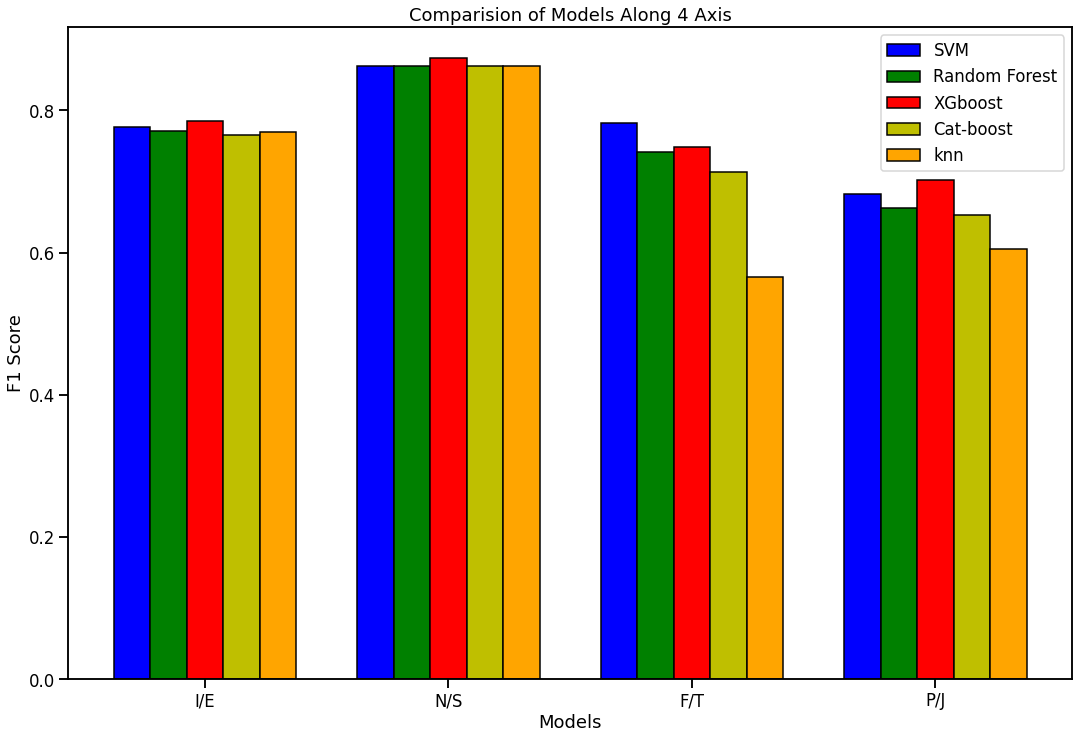

In [ ]:
#Plot for comparision between models

X = ['I/E','N/S', 'F/T', 'P/J']
ySVM = [f1_svmIE,f1_svmNS,f1_svmFT,f1_svmPJ]
yRF = [f1_rfIE,f1_rfNS,f1_rfFT,f1_rfPJ]
yXB = [f1_xgboostIE,f1_xgboostNS,f1_xgboostFT,f1_xgboostPJ]
yCB = [f1_catIE,f1_catNS,f1_catFT,f1_catPJ]
yKNN = [f1_knnIE,f1_knnNS,f1_knnFT,f1_knnPJ]


X_axis = np.arange(len(X))
plt.figure(figsize=(18,12))   
plt.bar(X_axis - 0.3, ySVM, 0.15, label = 'SVM',color = 'b',edgecolor = 'black')
plt.bar(X_axis - 0.15, yRF, 0.15, label = 'Random Forest',color = 'g',edgecolor = 'black')
plt.bar(X_axis - 0.0, yXB, 0.15, label = 'XGboost',color = 'r',edgecolor = 'black')
plt.bar(X_axis + 0.15, yCB, 0.15, label = 'Cat-boost',color = 'y',edgecolor = 'black')

plt.bar(X_axis + 0.3, yKNN, 0.15, label = 'knn',color = 'orange',edgecolor = 'black')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Comparision of Models Along 4 Axis")
plt.legend()

plt.show()

As we can see from the above graph, XGBoost is out-performing all other models along all the MBTI axis except F/T. 
For F/T, SVM has performed slightly better than XGboost.

But overall XGboost has performed the best in comparision to the other models.

### Deep Learning : MLP

---



In [ ]:
from sklearn.neural_network import MLPClassifier

### Grid Search :

In [ ]:
cv = CountVectorizer(analyzer="word", max_features=1000) 
xCV = cv.fit_transform(mbti_df['posts'])

tfidf = TfidfTransformer()

print("Now the dataset size is as below")
X_tfidf =  tfidf.fit_transform(xCV).toarray()
print(X_tfidf.shape)

Now the dataset size is as below
(8675, 1000)


In [ ]:
noOflayers = ['3-[1]','3-[2]','3-[3]','3-[4]','3-[5]','3-[10]','4-[2,1]','4-[2,2]','4-[2,3]','4-[2,5]', '4-[3,2]','4-[3,3]','4-[5,2]','4-[10,2]','5-[3,2,3]']
hidden_layers = [[1],[2],[3],[4],[5],[10],[2,1],[2,2],[2,3],[2,5],[3,2],[3,3],[5,2],[10,2],[3,2,3]]
scoresIE = []
scoresNS = []
scoresFT = []
scoresPJ = []

In [ ]:
for hl in hidden_layers :

  xIETrain, xIETest, yIETrain, yIETest = train_test_split(X_tfidf, yIE, test_size=0.25,stratify=yIE)
  xNSTrain, xNSTest, yNSTrain, yNSTest = train_test_split(X_tfidf, yNS, test_size=0.25,stratify=yNS)
  xFTTrain, xFTTest, yFTTrain, yFTTest = train_test_split(X_tfidf, yFT, test_size=0.25,stratify=yFT)
  xPJTrain, xPJTest, yPJTrain, yPJTest = train_test_split(X_tfidf, yPJ, test_size=0.25,stratify=yPJ)
  
  clf1 = MLPClassifier(hidden_layer_sizes=hl, max_iter=200).fit(xIETrain, yIETrain)
  ypredIEs = clf1.predict(xIETest)
  scoresIE.append(f1_score(yIETest, ypredIEs, average='micro'))

  clf2 = MLPClassifier(hidden_layer_sizes=hl, max_iter=200).fit(xNSTrain, yNSTrain)
  ypredNSs = clf2.predict(xNSTest)
  scoresNS.append(f1_score(yNSTest, ypredNSs, average='micro'))

  clf3 = MLPClassifier(hidden_layer_sizes=hl, max_iter=200).fit(xFTTrain, yFTTrain)
  ypredFTs = clf3.predict(xPJTest)
  scoresFT.append(f1_score(yFTTest, ypredFTs, average='micro'))

  clf4 = MLPClassifier(hidden_layer_sizes=hl, max_iter=200).fit(xPJTrain, yPJTrain)
  ypredPJs = clf4.predict(xPJTest)
  scoresPJ.append(f1_score(yPJTest, ypredPJs, average='micro'))

In [ ]:
avgScores = []
for i in range(0,len(noOflayers)) :
  avgScores.append((scoresIE[i] + scoresNS[i] + scoresFT[i] + scoresPJ[i])/4)

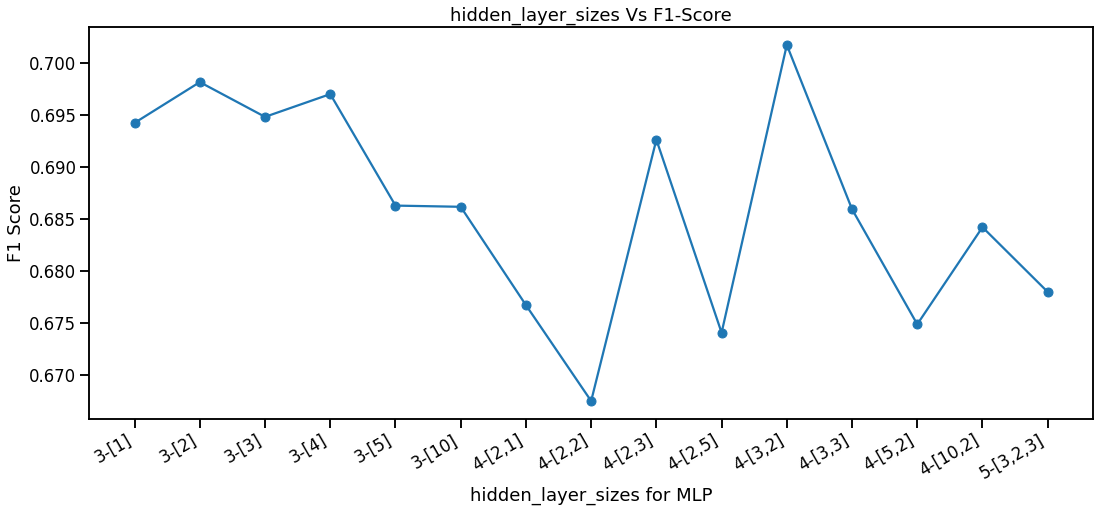

In [ ]:
import matplotlib.pyplot as plt
 
x = noOflayers
y = avgScores
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(8)
plt.plot(x, y, marker='o')

plt.xlabel('hidden_layer_sizes for MLP')

plt.ylabel('F1 Score')

plt.title('hidden_layer_sizes Vs F1-Score')

fig.autofmt_xdate()

plt.show()

As we can see MLP has performed the best when total number of layers = 4 including 2 hidden layers with nodes = 3,2 respectively.

So we will be considering this in our further analysis and evaluation.

### **Model Training and Results**

In [ ]:
cv = CountVectorizer(analyzer="word", max_features=5000) 
xCV = cv.fit_transform(mbti_df['posts'])

tfidf = TfidfTransformer()

print("Now the dataset size is as below")
X_tfidf =  tfidf.fit_transform(xCV).toarray()
print(X_tfidf.shape)

Now the dataset size is as below
(8675, 5000)


In [ ]:
xIETrain, xIETest, yIETrain, yIETest = train_test_split(X_tfidf, yIE, test_size=0.25,stratify=yIE)
xNSTrain, xNSTest, yNSTrain, yNSTest = train_test_split(X_tfidf, yNS, test_size=0.25,stratify=yNS)
xFTTrain, xFTTest, yFTTrain, yFTTest = train_test_split(X_tfidf, yFT, test_size=0.25,stratify=yFT)
xPJTrain, xPJTest, yPJTrain, yPJTest = train_test_split(X_tfidf, yPJ, test_size=0.25,stratify=yPJ)

clf1 = MLPClassifier(hidden_layer_sizes=[3,2], max_iter=200).fit(xIETrain, yIETrain)
ypredIEs = clf1.predict(xIETest)
f1IE = f1_score(yIETest, ypredIEs, average='micro')

clf2 = MLPClassifier(hidden_layer_sizes=[3,2], max_iter=200).fit(xNSTrain, yNSTrain)
ypredNSs = clf2.predict(xNSTest)
f1NS = f1_score(yNSTest, ypredNSs, average='micro')

clf3 = MLPClassifier(hidden_layer_sizes=[3,2], max_iter=200).fit(xFTTrain, yFTTrain)
ypredFTs = clf3.predict(xPJTest)
f1FT = f1_score(yFTTest, ypredFTs, average='micro')

clf4 = MLPClassifier(hidden_layer_sizes=[3,2], max_iter=200).fit(xPJTrain, yPJTrain)
ypredPJs = clf4.predict(xPJTest)
f1PJ = f1_score(yPJTest, ypredPJs, average='micro')

In [ ]:
print("Results : Testing")
print("------------------")

print("I/E :")
print(f1IE)
print("N/S :")
print(f1NS)
print("F/T :")
print(f1FT)
print("P/J :")
print(f1PJ)

Results : Testing
------------------
I/E :
0.7505763024435225
N/S :
0.8547717842323651
F/T :
0.5076071922544951
P/J :
0.6353158137390502


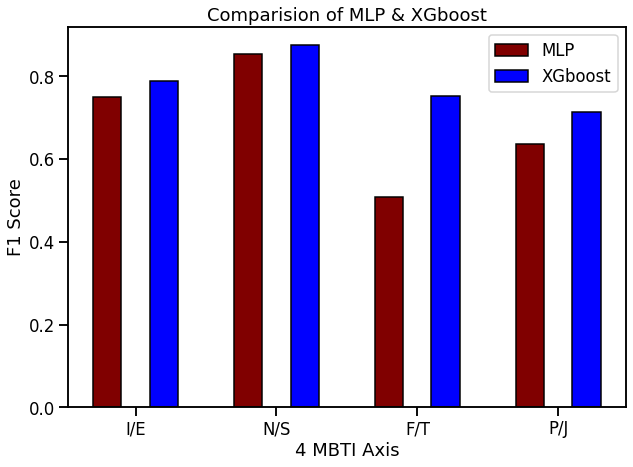

In [ ]:
X = ['I/E','N/S', 'F/T', 'P/J']
yXB = [f1_xgboostIE,f1_xgboostNS,f1_xgboostFT,f1_xgboostPJ]
yMLP = [f1IE,f1NS,f1FT,f1PJ]


X_axis = np.arange(len(X))
plt.figure(figsize=(10,7))   
plt.bar(X_axis - 0.2, yMLP, 0.2, label = 'MLP',color = 'maroon',edgecolor = 'black')
plt.bar(X_axis + 0.2, yXB, 0.2, label = 'XGboost',color = 'b',edgecolor = 'black')
  
plt.xticks(X_axis, X)
plt.xlabel("4 MBTI Axis")
plt.ylabel("F1 Score")
plt.title("Comparision of MLP & XGboost")
plt.legend()

We can see that XGboost has also outperformed MLP.
**So we are considering XGBoost as out final model.**



---



---



## **Predicting Jatin's Personality**

In [ ]:
statement= "I have been try to meet you but stuck in some work ||| I am really concern about him for his bad health ||| I will get some time from my busy schedule to plant trees around you so that you will be more benefited.||| He is so sweet in nature ||| I like to wear good apperals. I love to travel and i went to California once where I enjoyed a lot. I wanna do cooking in most of my free time"

In [ ]:
data = [['INJF',statement]]
myStatement = pd.DataFrame(data,columns=['type','posts'])
my_posts = preprocessing(myStatement)

In [ ]:
my_posts

,type,posts
0,INJF,meet stuck work really concern health time bus...


In [ ]:
xCV = cv.transform(my_posts['posts'])
X_tfidf =  tfidf.transform(xCV).toarray()

Y_pred_IE = xgbIE.predict(X_tfidf)
Y_pred_NS = xgbNS.predict(X_tfidf)
Y_pred_FT = xgbFT.predict(X_tfidf)
Y_pred_PJ = xgbPJ.predict(X_tfidf)

In [ ]:
Y_pred_IE

array(['I'], dtype=object)

In [ ]:
Y_pred_NS

array(['N'], dtype=object)

In [ ]:
Y_pred_FT

array(['F'], dtype=object)

In [ ]:
Y_pred_PJ

array(['P'], dtype=object)